In [2]:
pip install pymc3

In [0]:
import pymc3 as pm

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# Load training and test data sets and combine them for some necessary processing
training_dataset = pd.read_excel('TrainingData.xlsx')
test_dataset = pd.read_excel('TestData.xlsx')

In [115]:
training_dataset.head()

,Period,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,2016 - Period:1,504.784933,NaN,NaN,37148.2,2045.282,NaN,NaN,NaN,NaN,7.446883,NaN,100.0,32.950,0.5150,8.226,0.013258,42744.25684,42.410000,49.091447,9.691794,NaN,1.688896,1.427532,8696587915,39.441025,2.611782,0.0339,35.817030,NaN,NaN,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,2016 - Period:2,490.226477,NaN,NaN,50886.8,2370.584,0.000014,0.000015,NaN,NaN,11.677082,NaN,87.5,34.625,0.2700,7.473,0.009938,36290.43956,42.410000,49.057612,9.415938,NaN,1.687952,1.442716,8682307085,38.417224,2.522814,0.0391,36.389065,NaN,NaN,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,2016 - Period:3,479.244686,NaN,NaN,253333.2,3180.888,0.000016,0.000017,NaN,NaN,0.102858,NaN,96.0,46.700,0.3900,8.001,0.007832,34852.14166,42.410000,49.367514,5.176684,NaN,NaN,1.423408,8706897549,36.499442,2.477322,0.0228,36.599984,NaN,NaN,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,2016 - Period:4,489.057428,NaN,NaN,3426239.0,13595.398,0.000016,0.000019,NaN,NaN,0.249055,NaN,100.0,49.650,0.3500,8.767,0.010034,24869.55899,43.543571,50.657634,6.088273,NaN,NaN,1.443401,8660288592,38.135159,2.520409,0.0147,38.201852,NaN,NaN,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,2016 - Period:5,477.031994,NaN,NaN,552197.8,3983.134,0.000016,0.000019,NaN,NaN,13.338804,NaN,100.0,58.100,0.5025,9.277,0.009546,61675.32162,43.790000,50.625777,7.827112,NaN,0.170731,1.473687,8644518558,38.629564,2.497285,0.0219,38.648805,31.702433,25.3,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578


In [0]:
#Handling Missing Data
processed_training_data = training_dataset.fillna(0)
processed_test_data = test_dataset.fillna(0)
#Calculating Log values of the target variable to make it smoother
processed_training_data['Log_EQ'] = np.log(processed_training_data['EQ'])
processed_test_data['Log_EQ'] = np.log(processed_test_data['EQ'])

In [117]:
processed_training_data.head()

,Period,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory,Log_EQ
0,2016 - Period:1,504.784933,0.0,0.0,37148.2,2045.282,0.000000,0.000000,0.0,0.0,7.446883,0.0,100.0,32.950,0.5150,8.226,0.013258,42744.25684,42.410000,49.091447,9.691794,0.0,1.688896,1.427532,8696587915,39.441025,2.611782,0.0339,35.817030,0.000000,0.0,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563,6.224132
1,2016 - Period:2,490.226477,0.0,0.0,50886.8,2370.584,0.000014,0.000015,0.0,0.0,11.677082,0.0,87.5,34.625,0.2700,7.473,0.009938,36290.43956,42.410000,49.057612,9.415938,0.0,1.687952,1.442716,8682307085,38.417224,2.522814,0.0391,36.389065,0.000000,0.0,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301,6.194867
2,2016 - Period:3,479.244686,0.0,0.0,253333.2,3180.888,0.000016,0.000017,0.0,0.0,0.102858,0.0,96.0,46.700,0.3900,8.001,0.007832,34852.14166,42.410000,49.367514,5.176684,0.0,0.000000,1.423408,8706897549,36.499442,2.477322,0.0228,36.599984,0.000000,0.0,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115,6.172211
3,2016 - Period:4,489.057428,0.0,0.0,3426239.0,13595.398,0.000016,0.000019,0.0,0.0,0.249055,0.0,100.0,49.650,0.3500,8.767,0.010034,24869.55899,43.543571,50.657634,6.088273,0.0,0.000000,1.443401,8660288592,38.135159,2.520409,0.0147,38.201852,0.000000,0.0,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246,6.192480
4,2016 - Period:5,477.031994,0.0,0.0,552197.8,3983.134,0.000016,0.000019,0.0,0.0,13.338804,0.0,100.0,58.100,0.5025,9.277,0.009546,61675.32162,43.790000,50.625777,7.827112,0.0,0.170731,1.473687,8644518558,38.629564,2.497285,0.0219,38.648805,31.702433,25.3,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578,6.167584


In [0]:
# Segregating Period number to capture seasonality factor
period_maps = {'Period:1': 1, 'Period:2': 2, 'Period:3': 3, 'Period:4': 4, 'Period:5': 5, 
             'Period:6': 6, 'Period:7': 7, 'Period:8': 8, 'Period:9': 9, 'Period:10': 10, 
             'Period:11': 11, 'Period:12': 12, 'Period:13': 13}

processed_training_data.Period = processed_training_data.Period.str.strip()
processed_training_data[['Year','period_number']] = processed_training_data.Period.apply(lambda x: pd.Series(str(x).split("-")))
processed_training_data['period_number'] = processed_training_data['period_number'].str.strip().replace(period_maps)
processed_training_data['Year'] = processed_training_data['Year'].astype('int64')
processed_training_data['New_Index'] = processed_training_data["Year"].astype(str) + processed_training_data["period_number"].astype(str)
processed_training_data.set_index(['New_Index'], inplace=True)
processed_training_data.drop(['Period', 'Year', 'EQ'], axis=1, inplace=True)


processed_test_data.Period = processed_test_data.Period.str.strip()
processed_test_data[['Year','period_number']] = processed_test_data.Period.apply(lambda x: pd.Series(str(x).split("-")))
processed_test_data['period_number'] = processed_test_data['period_number'].str.strip().replace(period_maps)
processed_test_data['Year'] = processed_test_data['Year'].astype('int64')
processed_test_data['New_Index'] = processed_test_data["Year"].astype(str) + processed_training_data["period_number"].astype(str)
processed_test_data.set_index(['New_Index'], inplace=True)
processed_test_data.drop(['Period', 'Year', 'EQ'], axis=1, inplace=True)

In [119]:
processed_training_data.head()

,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory,Log_EQ,period_number
New_Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20161,0.0,0.0,37148.2,2045.282,0.000000,0.000000,0.0,0.0,7.446883,0.0,100.0,32.950,0.5150,8.226,0.013258,42744.25684,42.410000,49.091447,9.691794,0.0,1.688896,1.427532,8696587915,39.441025,2.611782,0.0339,35.817030,0.000000,0.0,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563,6.224132,1
20162,0.0,0.0,50886.8,2370.584,0.000014,0.000015,0.0,0.0,11.677082,0.0,87.5,34.625,0.2700,7.473,0.009938,36290.43956,42.410000,49.057612,9.415938,0.0,1.687952,1.442716,8682307085,38.417224,2.522814,0.0391,36.389065,0.000000,0.0,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301,6.194867,2
20163,0.0,0.0,253333.2,3180.888,0.000016,0.000017,0.0,0.0,0.102858,0.0,96.0,46.700,0.3900,8.001,0.007832,34852.14166,42.410000,49.367514,5.176684,0.0,0.000000,1.423408,8706897549,36.499442,2.477322,0.0228,36.599984,0.000000,0.0,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115,6.172211,3
20164,0.0,0.0,3426239.0,13595.398,0.000016,0.000019,0.0,0.0,0.249055,0.0,100.0,49.650,0.3500,8.767,0.010034,24869.55899,43.543571,50.657634,6.088273,0.0,0.000000,1.443401,8660288592,38.135159,2.520409,0.0147,38.201852,0.000000,0.0,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246,6.192480,4
20165,0.0,0.0,552197.8,3983.134,0.000016,0.000019,0.0,0.0,13.338804,0.0,100.0,58.100,0.5025,9.277,0.009546,61675.32162,43.790000,50.625777,7.827112,0.0,0.170731,1.473687,8644518558,38.629564,2.497285,0.0219,38.648805,31.702433,25.3,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578,6.167584,5


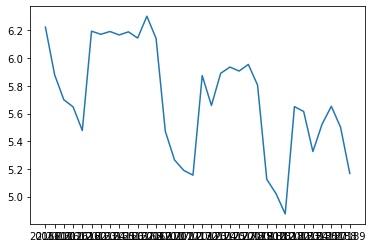

In [120]:
#Plot the timeseries of log sales data to visualize
sns.lineplot(data=processed_training_data.Log_EQ)

In [121]:
#Observa correlation matrix to remove number of obviously correlated variables
processed_training_data.corr()

,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory,Log_EQ,period_number
Social_Search_Impressions,1.000000,0.938816,0.401409,0.462469,0.565233,0.507324,0.514508,0.592668,-0.050276,-0.144148,-0.009190,0.440903,0.028735,0.430563,0.498669,-0.379080,-0.072509,0.090041,-0.195880,0.079874,0.023803,0.279782,-0.475692,-0.459771,-0.021492,-0.089211,0.134221,0.400015,0.311815,0.049583,-0.056970,0.120425,0.172666,0.245738,0.310892,-0.237488,0.108801,-0.266319,0.229146
Social_Search_Working_cost,0.938816,1.000000,0.495306,0.546335,0.624143,0.604455,0.486675,0.506233,0.010319,-0.064559,0.031572,0.487970,0.034782,0.384393,0.424182,-0.400097,-0.048606,0.167374,-0.278253,0.136415,0.098348,0.357609,-0.470188,-0.443866,-0.030420,-0.120065,0.222798,0.460054,0.348037,0.125852,0.041330,0.191363,0.281798,0.232342,0.297053,-0.268165,0.203087,-0.286371,0.299334
Digital_Impressions,0.401409,0.495306,1.000000,0.878865,0.332000,0.307845,0.315786,0.296836,0.219784,-0.066475,0.150773,0.258208,0.148619,0.258769,0.167402,-0.344369,-0.024190,0.332705,-0.431449,-0.011779,-0.020977,0.362873,-0.336415,-0.296036,-0.133092,-0.294630,0.402348,0.330218,0.249715,0.290836,0.519195,0.337939,0.344589,0.157476,0.205667,-0.384842,0.354064,-0.275247,0.332186
Digital_Working_cost,0.462469,0.546335,0.878865,1.000000,0.386194,0.393330,0.319242,0.307297,0.227575,-0.071077,0.174591,0.304023,0.239981,0.293472,0.257185,-0.425457,-0.049475,0.384295,-0.465599,0.015064,-0.030701,0.457329,-0.403472,-0.373057,-0.080793,-0.271260,0.416942,0.333146,0.192193,0.328231,0.513189,0.391884,0.400055,0.112279,0.155926,-0.369180,0.359647,-0.334590,0.342645
Print_Impressions.Ads40,0.565233,0.624143,0.332000,0.386194,1.000000,0.879826,0.735931,0.722546,0.030890,-0.004515,-0.050624,0.479514,0.599468,0.367674,0.376641,-0.408904,-0.122247,-0.222148,-0.137902,0.314928,0.090062,0.015521,-0.453150,-0.432950,-0.051087,0.031198,-0.158733,0.633093,0.601711,-0.283966,-0.232467,-0.238992,-0.122684,0.378703,0.451897,-0.137825,-0.135722,-0.144170,0.018104
Print_Working_Cost.Ads50,0.507324,0.604455,0.307845,0.393330,0.879826,1.000000,0.368285,0.371317,0.025605,-0.047728,-0.038614,0.437036,0.563843,0.209373,0.246522,-0.429500,-0.008395,-0.170789,-0.061527,0.533356,0.145516,0.237481,-0.345235,-0.316679,0.000954,0.169488,-0.077131,0.610542,0.526201,-0.149929,-0.234516,-0.213777,-0.080951,0.425455,0.481059,-0.062476,-0.013952,0.000946,-0.017953
OOH_Impressions,0.514508,0.486675,0.315786,0.319242,0.735931,0.368285,1.000000,0.971322,-0.012045,0.098784,-0.071185,0.434652,0.368754,0.499568,0.444615,-0.265474,-0.282688,-0.206719,-0.211105,-0.074524,0.020619,-0.255881,-0.483757,-0.475713,-0.102953,-0.177821,-0.212577,0.432265,0.436159,-0.369421,-0.111799,-0.143353,-0.106841,0.205742,0.291442,-0.227736,-0.247777,-0.313214,0.118594
OOH_Working_Cost,0.592668,0.506233,0.296836,0.307297,0.722546,0.371317,0.971322,1.000000,0.022154,0.041824,-0.079279,0.420047,0.367933,0.480011,0.452856,-0.254962,-0.270543,-0.274099,-0.132325,-0.036114,0.023498,-0.271112,-0.459949,-0.455280,-0.057088,-0.121033,-0.262649,0.445483,0.469257,-0.420176,-0.175251,-0.220592,-0.182282,0.254224,0.337773,-0.192833,-0.288670,-0.258070,0.090633
SOS_pct,-0.050276,0.010319,0.219784,0.227575,0.030890,0.025605,-0.012045,0.022154,1.000000,0.439188,-0.347537,0.024129,-0.020916,0.201343,-0.059743,-0.036249,-0.149393,0.067223,0.008236,0.165712,0.242077,-0.009358,-0.229135,-0.187358,0.121305,-0.105

#### Removing unnecessary data and highly correlated data before fitting a model###

Step 1:
We see that there is high correlation among a particular marketing channel and cost associated with it. So, we can remove the cost related variable from the data while keeping corresponding impressions variables.
Thus, we remove below data points from above data: -

Social_Search_Working_cost

Digital_Working_cost

Print_Working_Cost.Ads50

OOH_Working_Cost

Step 2:
We also remove few more hightly correlated variables

Picking up pct_ACV instead of Est_ACV_Selling

Step 3:

Among the four competitor RPI variables, we only keep Competitor2_RPI and Competitor4_RPI which have lower correlation and remove Competitor1_RPI and Competitor3_RPI

Step 4:
Among EQ_Category and EQ_Subcategory, which are again highly correlated variables, we keep EQ_Category which has higher correlation with target variable Log_EQ

Step 5:
Among RPI_Category and RPI_Subcategory, we get rid of RPI_Subcategory.


In [0]:
columns_to_be_dropped = ['Social_Search_Working_cost', 'Digital_Working_cost', 'Print_Working_Cost.Ads50', 'OOH_Working_Cost', 'Est_ACV_Selling', 'Competitor1_RPI', 'Competitor3_RPI', 'EQ_Subcategory', 'RPI_Subcategory']
processed_training_data.drop(columns_to_be_dropped, axis=1, inplace=True)

In [123]:
processed_training_data.head()

,Social_Search_Impressions,Digital_Impressions,Print_Impressions.Ads40,OOH_Impressions,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor2_RPI,Competitor4_RPI,EQ_Category,pct_PromoMarketDollars_Subcategory,Log_EQ,period_number
New_Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20161,0.0,37148.2,0.000000,0.0,7.446883,0.0,100.0,32.950,0.5150,8.226,0.013258,42744.25684,42.410000,49.091447,9.691794,0.0,1.688896,1.427532,39.441025,2.611782,0.0339,35.817030,0.000000,0.0,35.557371,63.377268,1728388.673,0.162732,6.224132,1
20162,0.0,50886.8,0.000014,0.0,11.677082,0.0,87.5,34.625,0.2700,7.473,0.009938,36290.43956,42.410000,49.057612,9.415938,0.0,1.687952,1.442716,38.417224,2.522814,0.0391,36.389065,0.000000,0.0,37.223072,62.731742,1900859.879,0.231650,6.194867,2
20163,0.0,253333.2,0.000016,0.0,0.102858,0.0,96.0,46.700,0.3900,8.001,0.007832,34852.14166,42.410000,49.367514,5.176684,0.0,0.000000,1.423408,36.499442,2.477322,0.0228,36.599984,0.000000,0.0,40.800563,62.090417,2036436.906,0.125394,6.172211,3
20164,0.0,3426239.0,0.000016,0.0,0.249055,0.0,100.0,49.650,0.3500,8.767,0.010034,24869.55899,43.543571,50.657634,6.088273,0.0,0.000000,1.443401,38.135159,2.520409,0.0147,38.201852,0.000000,0.0,36.576140,63.374358,2113635.013,0.056603,6.192480,4
20165,0.0,552197.8,0.000016,0.0,13.338804,0.0,100.0,58.100,0.5025,9.277,0.009546,61675.32162,43.790000,50.625777,7.827112,0.0,0.170731,1.473687,38.629564,2.497285,0.0219,38.648805,31.702433,25.3,36.032016,63.291934,2402211.102,0.065059,6.167584,5


In [124]:
processed_training_data.head()

,Social_Search_Impressions,Digital_Impressions,Print_Impressions.Ads40,OOH_Impressions,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor2_RPI,Competitor4_RPI,EQ_Category,pct_PromoMarketDollars_Subcategory,Log_EQ,period_number
New_Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20161,0.0,37148.2,0.000000,0.0,7.446883,0.0,100.0,32.950,0.5150,8.226,0.013258,42744.25684,42.410000,49.091447,9.691794,0.0,1.688896,1.427532,39.441025,2.611782,0.0339,35.817030,0.000000,0.0,35.557371,63.377268,1728388.673,0.162732,6.224132,1
20162,0.0,50886.8,0.000014,0.0,11.677082,0.0,87.5,34.625,0.2700,7.473,0.009938,36290.43956,42.410000,49.057612,9.415938,0.0,1.687952,1.442716,38.417224,2.522814,0.0391,36.389065,0.000000,0.0,37.223072,62.731742,1900859.879,0.231650,6.194867,2
20163,0.0,253333.2,0.000016,0.0,0.102858,0.0,96.0,46.700,0.3900,8.001,0.007832,34852.14166,42.410000,49.367514,5.176684,0.0,0.000000,1.423408,36.499442,2.477322,0.0228,36.599984,0.000000,0.0,40.800563,62.090417,2036436.906,0.125394,6.172211,3
20164,0.0,3426239.0,0.000016,0.0,0.249055,0.0,100.0,49.650,0.3500,8.767,0.010034,24869.55899,43.543571,50.657634,6.088273,0.0,0.000000,1.443401,38.135159,2.520409,0.0147,38.201852,0.000000,0.0,36.576140,63.374358,2113635.013,0.056603,6.192480,4
20165,0.0,552197.8,0.000016,0.0,13.338804,0.0,100.0,58.100,0.5025,9.277,0.009546,61675.32162,43.790000,50.625777,7.827112,0.0,0.170731,1.473687,38.629564,2.497285,0.0219,38.648805,31.702433,25.3,36.032016,63.291934,2402211.102,0.065059,6.167584,5


In [0]:
# using p-values of F-scores of linear regression tests as Scoring Function

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#X = dataset.drop(['EQ'], axis=1)
#y = dataset[['EQ']]

X = processed_training_data.drop(['Log_EQ'], axis=1)
y = processed_training_data[['Log_EQ']]

feat_selector = SelectKBest(score_func=f_regression, k=15)
best_feat = feat_selector.fit(X.values, y.values.ravel())

univ_select1 = pd.DataFrame({'features': X.columns,
              'pvalue': np.round(best_feat.pvalues_ * 100,2)}).sort_values(by='pvalue', ascending=True)
top_10_f_Regression = univ_select1.features.head(10).values

In [0]:
# using Mutual Information Estimator as Scoring Function

from sklearn.feature_selection import mutual_info_regression

feat_selector = SelectKBest(score_func=mutual_info_regression, k=15)
best_feat = feat_selector.fit(X.values, y.values.ravel())

univ_select2 = pd.DataFrame({'features': X.columns,
              'mutual importance score': best_feat.scores_}).sort_values(by='mutual importance score', ascending=False)

top_10_mutual_info = univ_select2.features.head(10).values

In [146]:
# Feature Importance from tree based algorithm

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=500, max_depth=10)
rf_reg.fit(X, y.values.ravel())
# print(rf_reg.feature_importances_)

feat_imp_selection_rf = pd.DataFrame({'features': X.columns, 
                                   'feature importance score': rf_reg.feature_importances_})\
.sort_values(by='feature importance score', ascending=False)

top_10_rf = feat_imp_selection_rf.features.head(10).values

AttributeError: ignored

In [147]:
# We combine top 10 features from above 3 methods and select unique features which explain the target variable most
top_features_list = [top_10_f_Regression, top_10_mutual_info, top_10_rf]
final_featuers_list = np.unique(top_features_list)
print("Following are top drivers of EQ")
print(final_featuers_list)

Following are top drivers of EQ
['Any_Promo_pct_ACV' 'Avg_EQ_Price' 'Avg_no_of_Items' 'Competitor2_RPI'
 'Competitor4_RPI' 'EQ_Base_Price' 'EQ_Category' 'Fuel_Price' 'Inflation'
 'Social_Search_Impressions' 'Trade_Invest' 'pct_ACV'
 'pct_PromoMarketDollars_Category' 'pct_PromoMarketDollars_Subcategory'
 'period_number']


#### Fitting final model for forecasting #####

We fit a linear regression model and a random forest model and then using votingregressor, combine these into a single model

In [0]:
# Data preparation before final model fit
training_subset = processed_training_data[final_featuers_list]
testing_subset = processed_test_data[final_featuers_list]

X_train = training_subset
y_train = processed_training_data['Log_EQ']

X_test = testing_subset
y_test = processed_test_data['Log_EQ']

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=10)
er = VotingRegressor([('lr', r1), ('rf', r2)])
print(er.fit(X_train, y_train).predict(X_test))

[5.86970174 5.74156375 5.60717377 5.5947056  5.07256736]


In [0]:
predictions = np.exp(er.fit(X_train, y_train).predict(X_test))

In [154]:
print(predictions)
print(np.exp(y_test))

[354.14333908 311.55121712 272.37336066 268.99844406 159.58350946]
New_Index
NaN    392.326431
NaN    300.922056
NaN    247.315476
NaN    278.317524
NaN    161.529279
Name: Log_EQ, dtype: float64


In [157]:
er.score(X=X_test, y=y_test)

0.9471764468427863

In [0]:
import pymc3 as pm